#**PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

#**1. Configuración del Ambiente**


---




In [1]:
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')
global df_title_basics,df_title_ratings,df_tmdb

Mounted at /content/drive


#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




##**2.1 Cargando las bases de datos**

In [2]:
df_title_basics = dd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Bootcamp/Movie_Analysis/imdb_dataset/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
#df_title_basics.compute()
## Función para verificar si hay '\N' en una fila
#def contains_N(series):
#    return (series == '\\N').any()
#
## Especificar el tipo de salida esperado
#meta = pd.Series([], dtype=bool)
#
## Aplicar la función a cada fila y contar cuántas filas cumplen la condición
#num_filas_con_N = df_title_basics.apply(contains_N, axis=1, meta=meta).sum().compute()
#
#print(f'Número de filas que contienen "\\N": {num_filas_con_N}')

In [4]:
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
646439,tt10872600,movie,Spider-Man: No Way Home,Spider-Man: No Way Home,0,2021,\N,148,"Action,Adventure,Fantasy"


In [5]:
df_title_ratings = dd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Bootcamp/Movie_Analysis/imdb_dataset/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(2)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277


In [6]:
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

,tconst,averageRating,numVotes
510210,tt10872600,8.20,885551


In [7]:
df_tmdb = dd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Bootcamp/Movie_Analysis/the_movies_dataset/TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head(2)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."


In [8]:
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
57,634649,Spider-Man: No Way Home,7.99,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,200000000,https://www.spidermannowayhome.movie,tt10872600,en,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,186.06,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog","new york city, hero, showdown, magic, loss of ..."


##**2.2 Tratamiento de Datos**

In [9]:
df_title_basics.shape[0].compute()

10826336

In [10]:
df_title_basics.titleType.value_counts(normalize=True).compute()

titleType
tvEpisode      0.77
short          0.09
movie          0.06
video          0.03
tvSeries       0.02
tvMovie        0.01
tvMiniSeries   0.01
tvSpecial      0.00
videoGame      0.00
tvShort        0.00
tvPilot        0.00
Name: proportion, dtype: double[pyarrow]

In [11]:
def preprocesamiento():
    global df_title_basics, df_title_ratings, df_tmdb

    # Filtrar los registros que sean 'tvSeries' o 'movie'
    df_title_basics = df_title_basics.loc[df_title_basics['titleType'].isin(['tvSeries', 'movie'])].compute()
    # Lista de columnas a mantener para el dataframe df_title_basics
    columnas_basics = [
        'tconst',
        'titleType',
        'originalTitle',
        'isAdult',
        'startYear',
        'runtimeMinutes',
        'genres'
    ]
    df_title_basics = df_title_basics[columnas_basics]
    df_title_basics = df_title_basics.dropna()
    df_title_basics = df_title_basics[df_title_basics['tconst'] != '\\N']
    df_title_basics = df_title_basics[df_title_basics['titleType'] != '\\N']
    df_title_basics = df_title_basics[df_title_basics['originalTitle'] != '\\N']
    df_title_basics = df_title_basics[df_title_basics['isAdult'] != '\\N']
    df_title_basics = df_title_basics[df_title_basics['startYear'] != '\\N']
    df_title_basics = df_title_basics[df_title_basics['runtimeMinutes'] != '\\N']
    df_title_basics = df_title_basics[df_title_basics['genres'] != '\\N']
    # Convertir tipos de datos
    df_title_basics['isAdult'] = df_title_basics['isAdult'].astype('int')
    df_title_basics['startYear'] = df_title_basics['startYear'].astype('int')
    df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].astype('int')
    df_title_basics.drop_duplicates(inplace=True)
    df_title_basics.drop_duplicates(subset='tconst', keep='first', inplace=True)

    df_title_ratings = df_title_ratings.compute()
    df_title_ratings = df_title_ratings.dropna()
    df_title_ratings = df_title_ratings[df_title_ratings['tconst'] != '\\N']
    df_title_ratings = df_title_ratings[df_title_ratings['averageRating'] != '\\N']
    df_title_ratings = df_title_ratings[df_title_ratings['numVotes'] != '\\N']
    # Convertir tipos de datos
    df_title_ratings['averageRating'] = df_title_ratings['averageRating'].astype('float')
    df_title_ratings['numVotes'] = df_title_ratings['numVotes'].astype('int')
    df_title_ratings.drop_duplicates(inplace=True)
    df_title_ratings.drop_duplicates(subset='tconst', keep='first', inplace=True)

    # Lista de columnas a mantener para el dataframe df_tmdb
    columnas_tmdb = [
        'imdb_id',
        'release_date',
        'budget',
        'revenue',
        'genres',
        'production_countries',
        'vote_average'
    ]
    df_tmdb = df_tmdb[columnas_tmdb].compute()
    # Filtrar los registros donde 'budget' y 'revenue' sean mayores a cero
    df_tmdb = df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]
    df_tmdb = df_tmdb.dropna()
    df_tmdb = df_tmdb[df_tmdb['imdb_id'] != '\\N']
    df_tmdb = df_tmdb[df_tmdb['release_date'] != '\\N']
    df_tmdb = df_tmdb[df_tmdb['budget'] != '\\N']
    df_tmdb = df_tmdb[df_tmdb['revenue'] != '\\N']
    df_tmdb = df_tmdb[df_tmdb['genres'] != '\\N']
    df_tmdb = df_tmdb[df_tmdb['production_countries'] != '\\N']
    df_tmdb = df_tmdb[df_tmdb['vote_average'] != '\\N']
    # Convertir tipos de datos
    df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
    df_tmdb['budget'] = df_tmdb['budget'].astype('int')
    df_tmdb['revenue'] = df_tmdb['revenue'].astype('int')
    df_tmdb['vote_average'] = df_tmdb['vote_average'].astype('float')
    # Calcular la columna 'roi'
    df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']
    # Calcular los cuartiles y el rango intercuartílico (IQR)
    Q1 = df_tmdb['roi'].quantile(0.25)
    Q3 = df_tmdb['roi'].quantile(0.75)
    IQR = Q3 - Q1
    # Definir los límites inferior y superior para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar los datos para eliminar los outliers
    df_tmdb = df_tmdb.loc[df_tmdb['roi'].between(lower_bound, upper_bound)]
    df_tmdb.drop_duplicates(inplace=True)
    df_tmdb.drop_duplicates(subset='imdb_id', keep='first', inplace=True)


In [12]:
preprocesamiento()
print(df_title_basics.info())
print('-------------')
print(df_title_ratings.info())
print('-------------')
print(df_tmdb.info())

<ipython-input-11-562f280c3ecf>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_basics['isAdult'] = df_title_basics['isAdult'].astype('int')


<class 'pandas.core.frame.DataFrame'>
Index: 492629 entries, 8 to 783039
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          492629 non-null  string
 1   titleType       492629 non-null  string
 2   originalTitle   492629 non-null  string
 3   isAdult         492629 non-null  int64 
 4   startYear       492629 non-null  int64 
 5   runtimeMinutes  492629 non-null  int64 
 6   genres          492629 non-null  string
dtypes: int64(3), string(4)
memory usage: 43.7 MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443621 entries, 0 to 1443620
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1443621 non-null  string 
 1   averageRating  1443621 non-null  float64
 2   numVotes       1443621 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 40.2 MB
None
------------

<ipython-input-11-562f280c3ecf>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmdb.drop_duplicates(inplace=True)
<ipython-input-11-562f280c3ecf>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmdb.drop_duplicates(subset='imdb_id', keep='first', inplace=True)


In [13]:
df_title_basics.head(10)

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
930,tt0000941,movie,Locura de amor,0,1909,45,Drama
1172,tt0001184,movie,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"
1273,tt0001285,movie,The Life of Moses,0,1909,50,"Biography,Drama,Family"
1485,tt0001498,movie,The Battle of Trafalgar,0,1911,51,War
1578,tt0001592,movie,Ekspeditricen,0,1911,52,Drama


In [14]:
df_title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2020
3,tt0000004,5.30,180
4,tt0000005,6.20,2786


In [15]:
df_tmdb.head()

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8.36,4.16
1,tt0816692,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8.42,3.25
2,tt0468569,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8.51,4.43
4,tt0848228,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7.71,5.90
6,tt4154756,2018-04-25,300000000,2052415039,"Adventure, Action, Science Fiction",United States of America,8.26,5.84


##**2.3 Análisis Exploratorio (EDA)**

In [16]:
df_title_basics.describe()

,isAdult,startYear,runtimeMinutes
count,492629.00,492629.00,492629.00
mean,0.01,1998.21,81.47
std,0.11,25.27,118.06
min,0.00,1894.00,1.00
25%,0.00,1985.00,60.00
50%,0.00,2009.00,84.00
75%,0.00,2017.00,98.00
max,1.00,2029.00,51420.00


In [17]:
df_title_ratings.describe()

,averageRating,numVotes
count,1443621.00,1443621.00
mean,6.96,1032.36
std,1.38,17696.14
min,1.00,5.00
25%,6.20,11.00
50%,7.20,26.00
75%,7.90,101.00
max,10.00,2901903.00


In [18]:
df_tmdb.describe()

,release_date,budget,revenue,vote_average,roi
count,9160,9160.00,9160.00,9160.00,9160.00
mean,2002-02-12 04:07:07.598253184,24874262.70,59237860.40,6.16,1.06
min,1914-04-25 00:00:00,1.00,1.00,0.00,-1.00
25%,1995-12-22 00:00:00,2500000.00,1500000.00,5.74,-0.42
50%,2007-03-30 00:00:00,10000000.00,11133849.00,6.38,0.49
75%,2014-09-05 00:00:00,30000000.00,50287672.25,6.99,2.00
max,2024-07-23 00:00:00,460000000.00,2800000000.00,10.00,7.60
std,NaN,38878837.30,141219501.60,1.60,1.93


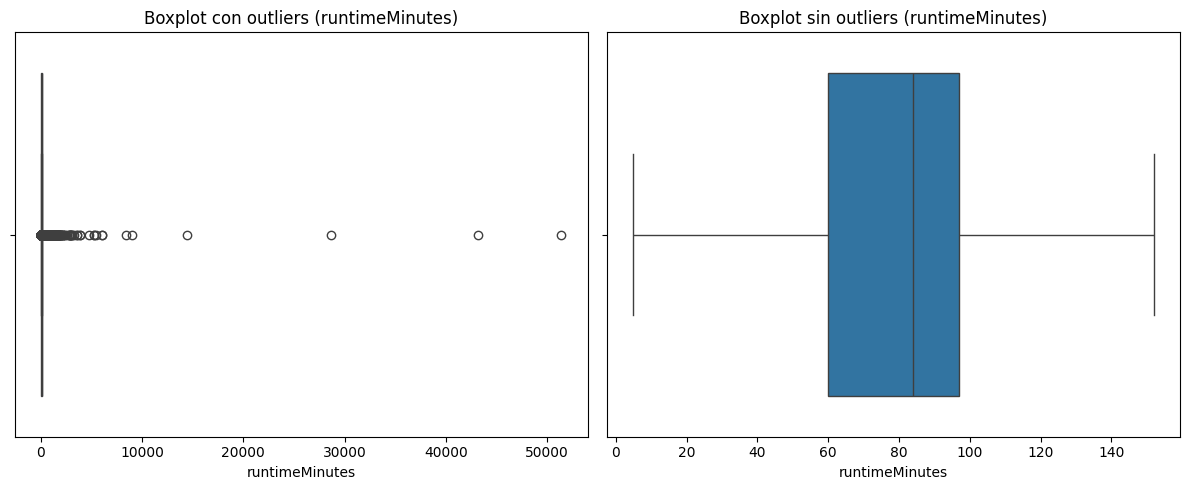

In [19]:

# Gráfico con outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_title_basics['runtimeMinutes'])
plt.title('Boxplot con outliers (runtimeMinutes)')

# Eliminar outliers usando el método del rango intercuartílico (IQR)
Q1 = df_title_basics['runtimeMinutes'].quantile(0.25)
Q3 = df_title_basics['runtimeMinutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sin_outliers = df_title_basics[(df_title_basics['runtimeMinutes'] >= lower_bound) & (df_title_basics['runtimeMinutes'] <= upper_bound)]

# Gráfico sin outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sin_outliers['runtimeMinutes'], showfliers=False)
plt.title('Boxplot sin outliers (runtimeMinutes)')

plt.tight_layout()
plt.show()


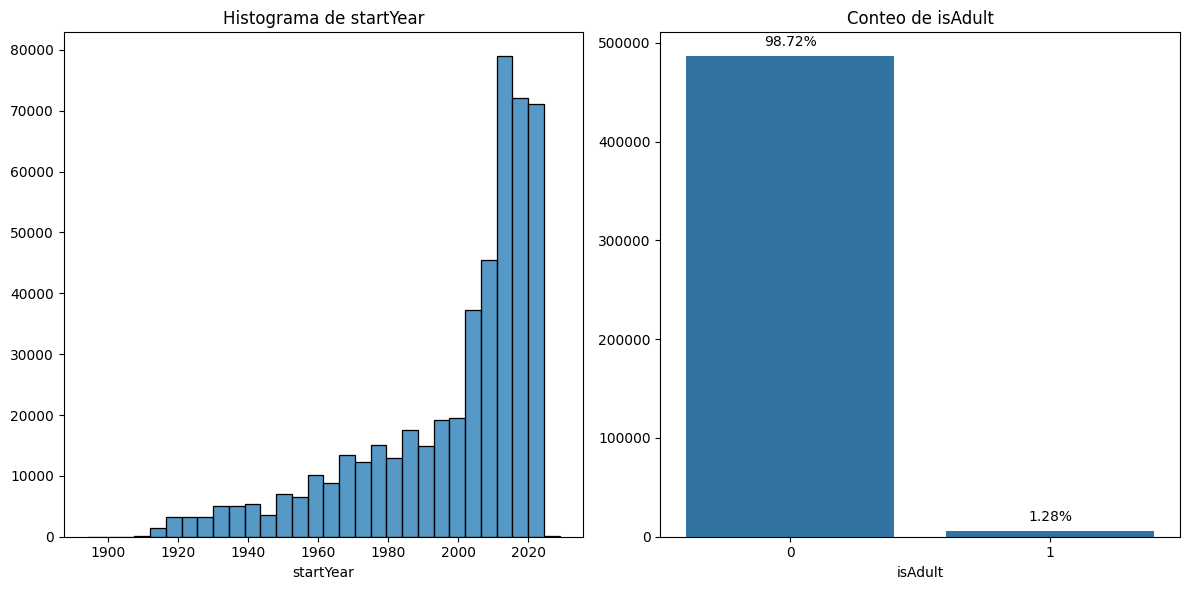

In [20]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de histograma para startYear
sns.histplot(data=df_title_basics, x='startYear', bins=30, ax=ax1)
ax1.set_title('Histograma de startYear')
ax1.set_xlabel('startYear')
ax1.set_ylabel('')

# Gráfico de conteo para isAdult
ax2 = sns.countplot(x='isAdult', data=df_title_basics, ax=ax2)
ax2.set_title('Conteo de isAdult')
ax2.set_xlabel('isAdult')
ax2.set_ylabel('')

# Calcular los porcentajes y añadir anotaciones
total = len(df_title_basics)
for p in ax2.patches:
    count = p.get_height()
    percentage = f'{count / total:.2%}'
    ax2.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


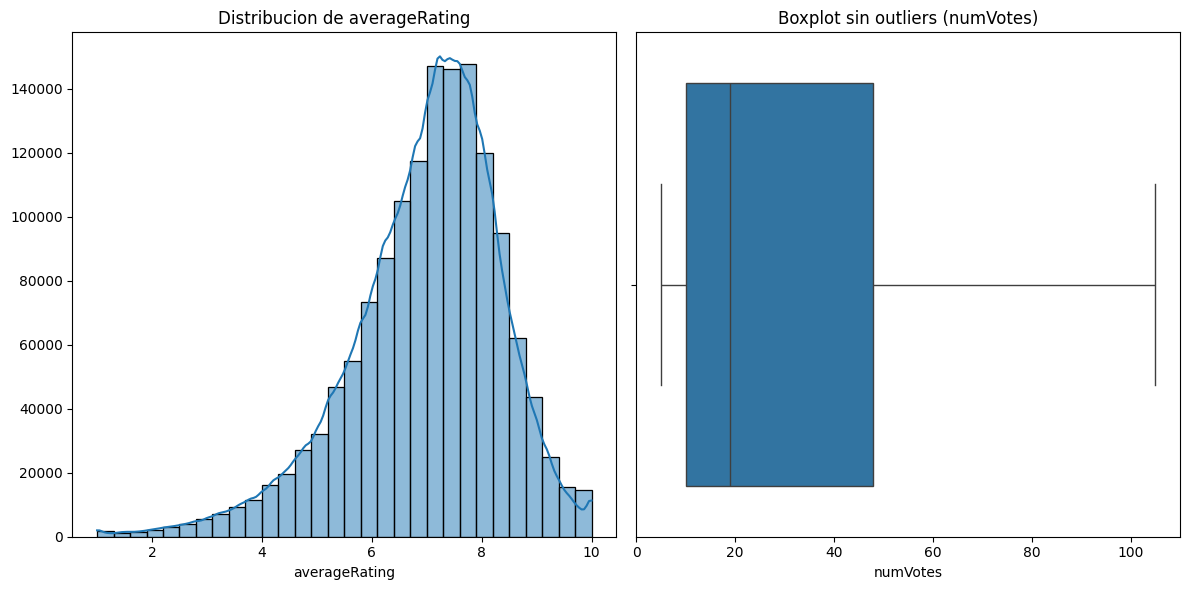

In [21]:
 # Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de histograma para averageRating
sns.histplot(data=df_title_ratings, x='averageRating', bins=30, kde=True, ax=ax1)
ax1.set_title('Distribucion de averageRating')
ax1.set_xlabel('averageRating')
ax1.set_ylabel('')

# Eliminar outliers usando el método del rango intercuartíl (IQR)
Q1 = df_title_ratings['numVotes'].quantile(0.25)
Q3 = df_title_ratings['numVotes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sin_outliers = df_title_ratings[(df_title_ratings['numVotes'] >= lower_bound) & (df_title_ratings['numVotes'] <= upper_bound)]

# Gráfico sin outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sin_outliers['numVotes'], showfliers=False)
plt.title('Boxplot sin outliers (numVotes)')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


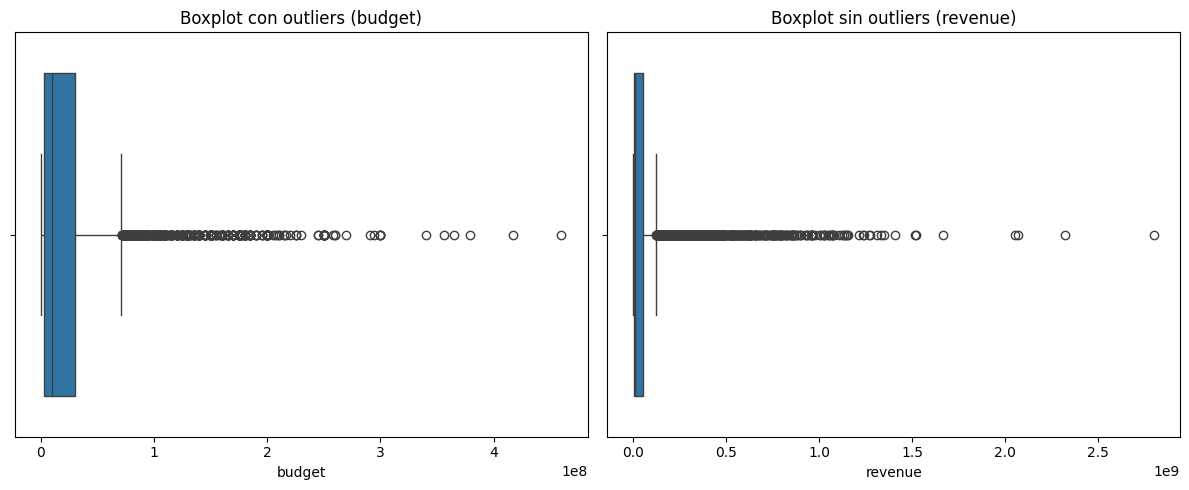

In [22]:
# Gráfico sin outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_tmdb['budget'])
plt.title('Boxplot con outliers (budget)')


plt.subplot(1, 2, 2)
sns.boxplot(x=df_tmdb['revenue'])
plt.title('Boxplot sin outliers (revenue)')

plt.tight_layout()
plt.show()


In [23]:
df_title_basics=df_title_basics[['tconst','titleType','originalTitle','startYear','runtimeMinutes','genres']]
df_title_basics=df_title_basics[(df_title_basics.startYear.between(1990,2024))&(df_title_basics.runtimeMinutes.between(15,180))]
df_title_ratings=df_title_ratings[(df_title_ratings.numVotes>1000)&(df_title_ratings.averageRating>0)]
df_tmdb=df_tmdb[(df_tmdb.budget>500000)&(df_tmdb.revenue>500000)]

In [24]:
df_title_basics.head()

,tconst,titleType,originalTitle,startYear,runtimeMinutes,genres
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,2021,94,Documentary
15482,tt0015724,movie,Dama de noche,1993,102,"Drama,Mystery,Romance"
34797,tt0035423,movie,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance"
57969,tt0059097,movie,"Denk bloß nicht, ich heule",1990,91,Drama
58193,tt0059325,movie,Jahrgang 45,1990,100,"Drama,Romance"


#**3. Preguntas y respuestas**


---




##**Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

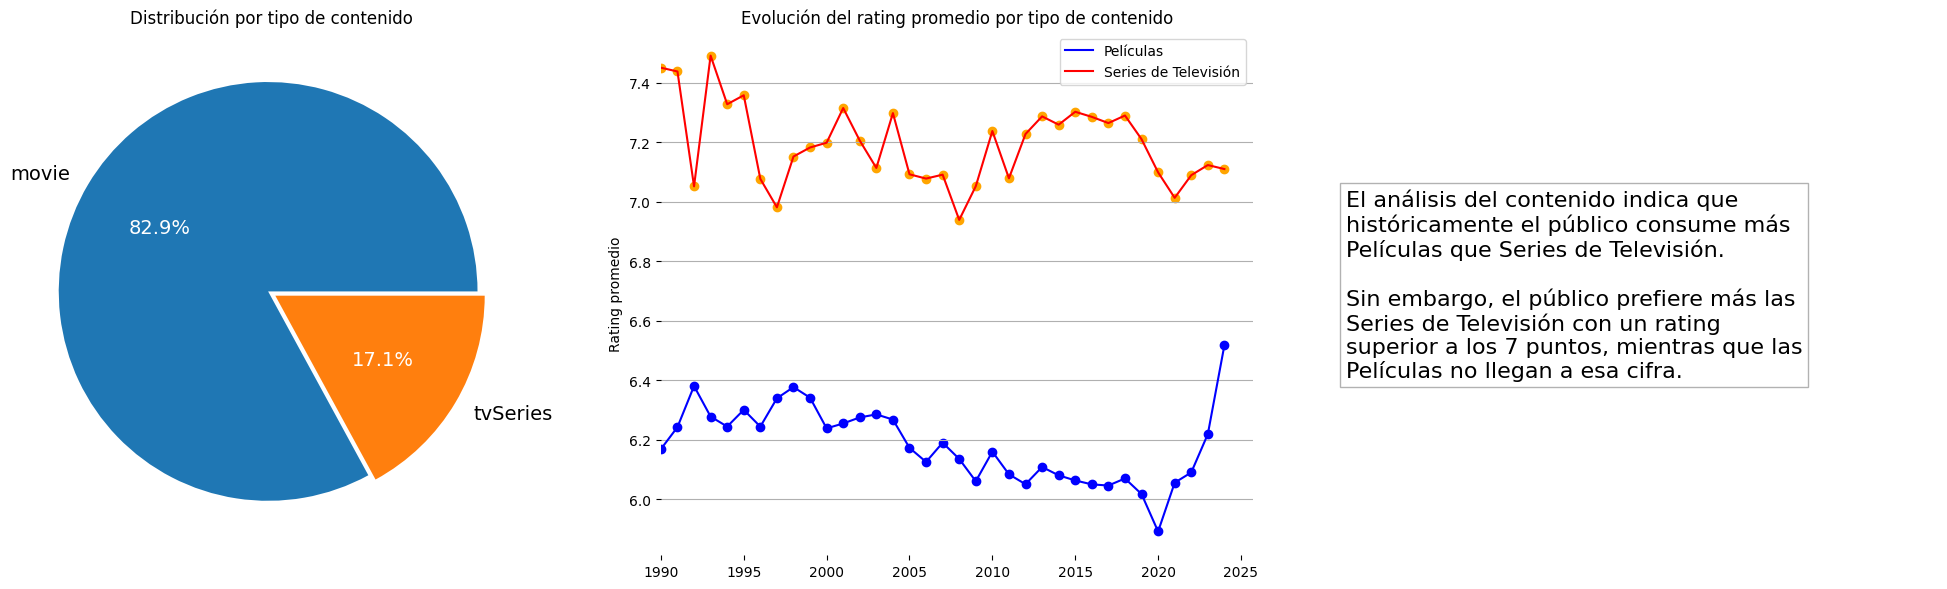

In [25]:
def pregunta_1():
  global df_title_basics, df_title_ratings, df_tmdb
  # Combinar los dataframes 'df_title_basics' y 'df_title_ratings' por 'tconst'
  df_merged = df_title_basics.merge(df_title_ratings, on='tconst')

  # Agrupar por 'titleType' y contar el número de registros
  df_grouped_type = df_merged.groupby('titleType').size().to_frame(name='count').reset_index()

  # Calcular el porcentaje para cada categoría
  df_grouped_type['Porcentaje'] = df_grouped_type['count'] / df_grouped_type['count'].sum() * 100

  # Agrupar por 'titleType' y año, y calcular el rating promedio
  df_grouped_rating = df_merged.groupby(['titleType', 'startYear'])['averageRating'].mean().reset_index()

  # Filtrar por tipo de contenido específico (películas y series de televisión)
  df_movies = df_grouped_rating[(df_grouped_rating['titleType'] == 'movie') & (df_grouped_rating['startYear'] >= 1990)]
  df_tvseries = df_grouped_rating[(df_grouped_rating['titleType'] == 'tvSeries') & (df_grouped_rating['startYear'] >= 1990)]

  # Crear la figura y los subplots con tamaños más controlados
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

  # Gráfico de pizza en el primer subplot (ax1)
  wedges, texts, autotexts = ax1.pie(df_grouped_type['Porcentaje'], labels=df_grouped_type['titleType'], autopct="%1.1f%%", explode=(0.02, 0.02), textprops={'color': 'white', 'fontsize': 14})
  ax1.set_title("Distribución por tipo de contenido")
  # Ajustar colores de los textos
  for text in texts:
      text.set_color('black')
  for autotext in autotexts:
      autotext.set_color('white')

  # Gráfico lineal en el segundo subplot (ax2)
  ax2.plot(df_movies['startYear'], df_movies['averageRating'], label='Películas', color='blue')
  ax2.plot(df_tvseries['startYear'], df_tvseries['averageRating'], label='Series de Televisión', color='red')

  # Añadir puntos a las líneas
  ax2.scatter(df_movies['startYear'], df_movies['averageRating'], color='blue')
  ax2.scatter(df_tvseries['startYear'], df_tvseries['averageRating'], color='orange')

  # Ajustes para quitar cuadro delimitador y añadir líneas horizontales
  ax2.spines['top'].set_visible(False)
  ax2.spines['right'].set_visible(False)
  ax2.spines['left'].set_visible(False)
  ax2.spines['bottom'].set_visible(False)
  ax2.yaxis.grid(True)  # Añadir líneas horizontales
  ax2.set_xlim(1990, None)  # Establecer el límite inferior del eje x en 1990
  ax2.set_xlabel("")
  ax2.set_ylabel("Rating promedio")
  ax2.set_title("Evolución del rating promedio por tipo de contenido")
  ax2.legend()

  # Añadir texto descriptivo al tercer subplot (ax3)
  ax3.text(0, 0.7, "El análisis del contenido indica que\nhistóricamente el público consume más\nPelículas que Series de Televisión.\n\nSin embargo, el público prefiere más las\nSeries de Televisión con un rating\nsuperior a los 7 puntos, mientras que las\nPelículas no llegan a esa cifra.",
           fontsize=16, ha='left', va='top', backgroundcolor='lightgrey', bbox=dict(facecolor='white', alpha=0.3))
  ax3.axis('off')  # Desactivar ejes para el subplot de texto

  # Ajustar el espaciado entre los subplots
  plt.tight_layout()

  # Mostrar los gráficos
  plt.show()
pregunta_1()

##**Pregunta 2: ¿Cual es el rating promedio por género?**

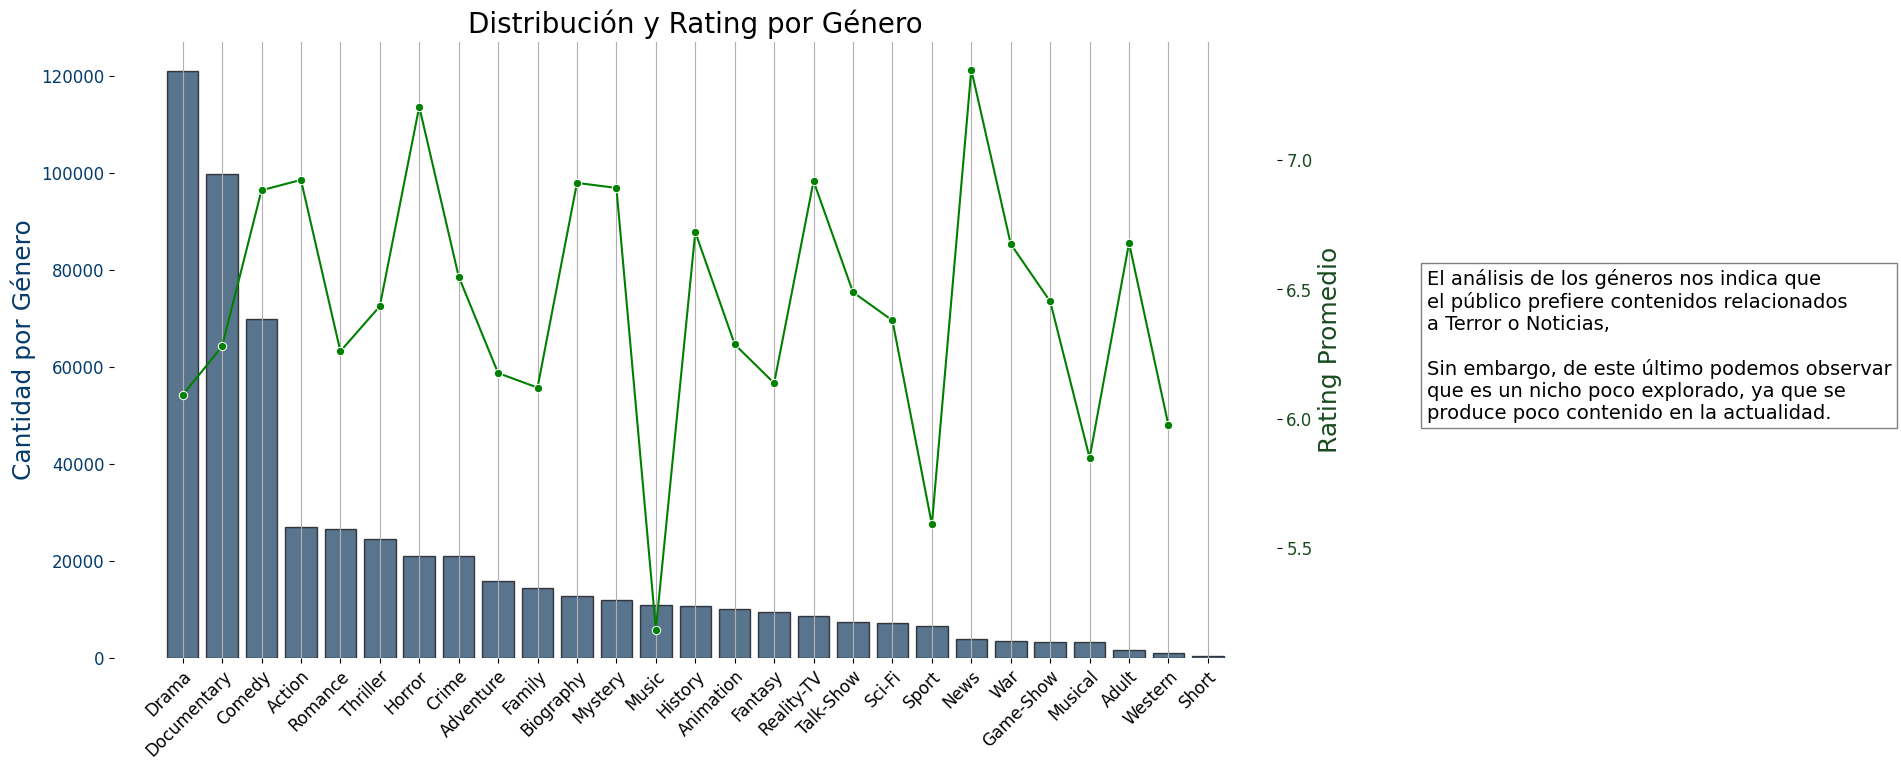

In [58]:
def pregunta_2():
    global df_title_basics, df_title_ratings, df_tmdb
    # Preparación de los datos
    df_title_basics_expanded = df_title_basics.assign(genre=df_title_basics['genres'].str.split(',')).explode('genre')
    # Merge de df_title_basics_expanded y df_title_ratings
    df_merged = pd.merge(df_title_basics_expanded, df_title_ratings, on='tconst')
    # Agrupación por género y cálculo de estadísticas
    df_genre_stats = df_merged.groupby('genre').agg(
        avg_rating=('averageRating', 'mean'),
        movie_count=('tconst', 'count')
    ).reset_index()
    # Visualización
    fig, ax1 = plt.subplots(figsize=(15, 8))
    # Grafico de barras
    sns.countplot(data=df_title_basics_expanded, x='genre', ax=ax1, order=df_title_basics_expanded['genre'].value_counts().index, edgecolor='black', linewidth=1, color='#063C6C', alpha=0.7)
    ax1.set_xlabel('')
    ax1.set_ylabel('Cantidad por Género', color='#063C6C', fontsize=18)
    ax1.tick_params(axis='y', labelcolor='#063C6C')
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax1.tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x a 45 grados
    ax1.xaxis.grid(True)  # Añadir líneas verticales
    # Ajustes para quitar cuadro delimitador y añadir líneas horizontales al ax1 que es el de las barras
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    # Ajustar las etiquetas del eje x
    ax1.set_xticks(range(len(df_title_basics_expanded['genre'].unique())))
    ax1.set_xticklabels(df_title_basics_expanded['genre'].value_counts().index, rotation=45, ha='right')

    # Ajustar el espacio entre las etiquetas del eje x
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    # Crear un segundo eje y graficar el rating promedio
    ax2 = ax1.twinx()
    # Ajustes para quitar cuadro delimitador y añadir líneas horizontales al segundo eje, el de la línea
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    sns.lineplot(data=df_genre_stats, x='genre', y='avg_rating', ax=ax2, color='g', marker='o')
    ax2.set_ylabel('Rating Promedio', color='#194B1E', fontsize=18)
    ax2.tick_params(axis='y', labelcolor='#194B1E', labelsize=12)
    # Añadir texto descriptivo al lado derecho
    fig.text(1, 0.5, 'El análisis de los géneros nos indica que\n'
                     'el público prefiere contenidos relacionados\n'
                     'a Terror o Noticias,\n\n'
                     'Sin embargo, de este último podemos observar\n'
                     'que es un nicho poco explorado, ya que se \n'
                     'produce poco contenido en la actualidad.',
             fontsize=14, ha='left', va='center', backgroundcolor='lightgrey', bbox=dict(facecolor='white', alpha=0.5))
    # Título del gráfico
    plt.title('Distribución y Rating por Género', fontsize=20)
    plt.show()
    df_title_basics_expanded['genre'].value_counts()
# Llamar a la función para preparar los datos y mostrar la visualización
pregunta_2()


##**Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?**

genre
Drama              896
Action             736
Comedy             730
Thriller           583
Adventure          530
Romance            360
Crime              349
Science Fiction    337
Fantasy            307
Family             283
Horror             236
Mystery            201
Animation          170
History            111
War                 93
Music               58
Western             34
Documentary          5
TV Movie             1
Name: count, dtype: int64


<ipython-input-52-8e73593f7ac8>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




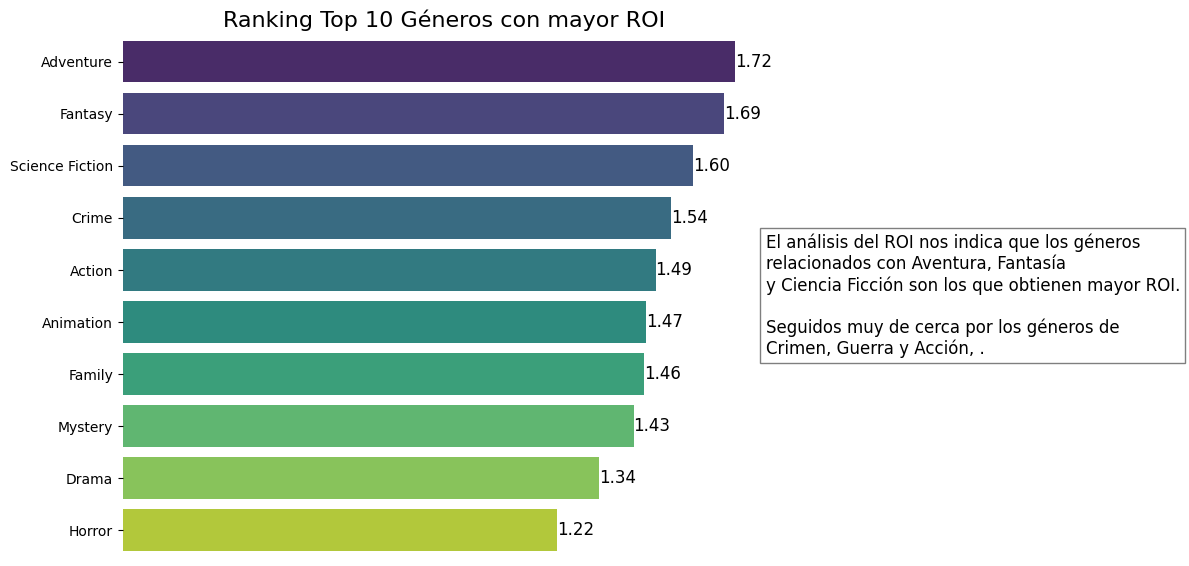

In [52]:
def pregunta_3():
    global df_title_basics, df_title_ratings, df_tmdb

    # Separar los múltiples valores de géneros
    df_tmdb_expanded = df_tmdb.assign(genre=df_tmdb['genres'].str.split(',').explode('genre').str.strip())

    # Contar el número de registros por género
    genre_counts = df_tmdb_expanded['genre'].value_counts()
    print(genre_counts)

    # Filtrar géneros con al menos 100 registros
    valid_genres = genre_counts[genre_counts >= 100].index
    df_tmdb_filtered = df_tmdb_expanded[df_tmdb_expanded['genre'].isin(valid_genres)]

    # Calcular el ROI promedio por género
    df_genre_roi = df_tmdb_filtered.groupby('genre')['roi'].mean().sort_values(ascending=False).head(10).reset_index()

    # Seleccionar los 10 géneros con mayor ROI
    top_10_genres = df_genre_roi.head(10)

    # Crear el gráfico de barras horizontal
    plt.figure(figsize=(12, 6))
    sns.barplot(x='roi', y='genre', data=df_genre_roi, palette='viridis', order=top_10_genres['genre'])

    # Añadir etiquetas y título
    plt.xlabel('', fontsize=14)
    plt.ylabel('', fontsize=14)
    plt.title('Ranking Top 10 Géneros con mayor ROI', fontsize=16)

    # Añadir etiquetas de datos
    for index, value in enumerate(top_10_genres['roi']):
        plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=12)

    # Añadir texto descriptivo al lado derecho
    plt.text(1, 0.5, 'El análisis del ROI nos indica que los géneros\n'
                     'relacionados con Aventura, Fantasía\n'
                     'y Ciencia Ficción son los que obtienen mayor ROI.\n\n'
                     'Seguidos muy de cerca por los géneros de\n'
                     'Crimen, Guerra y Acción, .',
             fontsize=12, ha='left', va='center', transform=plt.gca().transAxes, backgroundcolor='lightgrey', bbox=dict(facecolor='white', alpha=0.5))

    # Ajustar el espaciado
    plt.tight_layout()

    # Eliminar el eje de las x
    plt.gca().axes.get_xaxis().set_visible(False)

    # Mostrar el gráfico sin el borde delimitador
    plt.box(False)

    # Mostrar el gráfico
    plt.show()

pregunta_3()


##**Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

In [28]:
#@title
def pregunta_4():
  global df_title_basics, df_title_ratings, df_tmdb
  import plotly.express as px
  df_tmdb_exploded_countries = df_tmdb.assign(production_countries=df_tmdb['production_countries'].str.split(',')).explode('production_countries').copy()
  df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

  # Creamos un DataFrame con los datos necesarios para el gráfico
  df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi': 'mean', 'production_countries': 'count'})
  df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

  # Ordenar por número de producciones y seleccionar los primeros 13 países
  df_plot = df_plot.sort_values(by='count', ascending=False).head(12)

  # Asignamos posiciones fijas en una cuadrícula
  num_countries = len(df_plot)
  grid_size = int(np.ceil(np.sqrt(num_countries)))
  df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
  df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]

  # Invertir el eje y para que los valores más altos aparezcan en la parte superior
  df_plot['y'] = -df_plot['y']

  # Creamos el gráfico de burbujas usando Plotly
  fig = px.scatter(df_plot, x='x', y='y',
                   size='count', color='roi',
                   text=df_plot.index,
                   color_continuous_scale='Blues',
                   size_max=110)

  # Ajustar el layout para eliminar el grid y mejorar la visualización
  fig.update_traces(textposition='middle center', textfont_size=16)
  fig.update_layout(title={
                        'text': 'Paises con mayor producción de contenido',
                        'x': 0.5,  # Centramos el título
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    xaxis_title='', yaxis_title='',
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    showlegend=False,
                    plot_bgcolor='white',  # Eliminar el fondo del gráfico
                    height=650,
                    width=1000)


  # Mostrar el gráfico
  fig.show()
pregunta_4()

##Pregunta 5: ¿Cuáles son las 10 películas más votadas?  

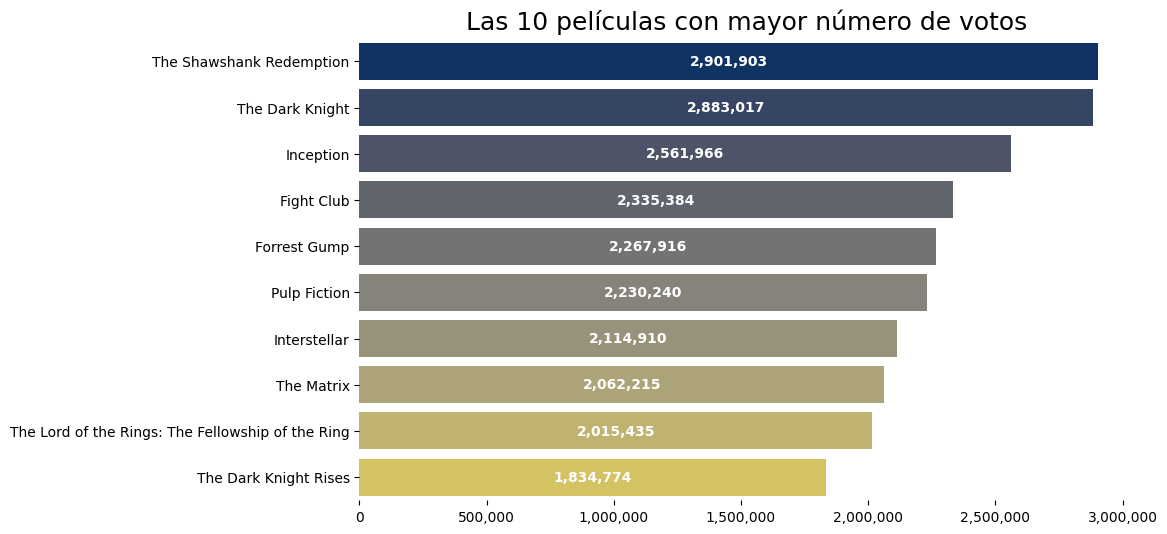

In [29]:
#@title
def pregunta_5():
  global df_title_basics, df_title_ratings, df_tmdb
  # Filtrar solo los registros donde titleType es 'movie'
  df_title_basics_movies = df_title_basics[df_title_basics['titleType'] == 'movie']

  # Realizar el merge en la columna tconst
  df_merged = pd.merge(df_title_basics_movies, df_title_ratings, on='tconst')

  # Ordenar por numVotes de mayor a menor
  df_sorted = df_merged.sort_values(by='numVotes', ascending=False)

  # Seleccionar las primeras 10 películas
  top_10_movies = df_sorted.head(10)

  # Crear un gráfico de barras con seaborn
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(x='numVotes', y='originalTitle', data=top_10_movies, palette='cividis', hue='originalTitle')
  plt.xlabel('')
  plt.ylabel('')
  plt.title('Las 10 películas con mayor número de votos', fontsize=18)

  # Función para formatear los números con puntos como separadores de miles
  formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace('.', ','))
  ax.xaxis.set_major_formatter(formatter)

  # Añadir los valores centrados en las barras
  for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,  # Posición X del texto (centrado)
              p.get_y() + p.get_height() / 2,  # Posición Y del texto (centrado)
              '{:,.0f}'.format(width),  # Formato del texto con puntos como separadores de miles
              ha='center', va='center',  # Alineación horizontal y vertical del texto
              color='white',  # Color del texto
              fontsize=10,  # Tamaño de fuente del texto
              weight='bold')  # Estilo de fuente (negrita)

  # Quitar el cuadro delimitador
  sns.despine(trim=True, top=True, bottom=True, right=True, left=True)
  plt.show()
pregunta_5()

##Conclusiones:



1.   **Evolución del rating por tipo de contenido**:
Se observa una tendencia positiva en el rating de ciertos tipos de contenido a lo largo del tiempo, indicando una preferencia creciente por ciertos géneros o formatos específicos. Esto sugiere que la plataforma podría beneficiarse al enfocar sus esfuerzos en la producción o adquisición de estos tipos de contenido más populares.
2.   **Rating promedio por género**:
Al analizar el rating promedio por género, se identifican ciertos géneros que consistentemente obtienen ratings más altos. Estos géneros pueden ser prioritarios para la plataforma al seleccionar o desarrollar nuevo contenido, ya que tienen una mayor probabilidad de atraer y retener a los espectadores.
3.   **Géneros con mayor ROI**:
Se han identificado los géneros que ofrecen un retorno de inversión (ROI) más alto. Estos géneros no solo tienen altos ratings, sino que también son rentables en términos de costos de producción versus ingresos generados. Es recomendable para la plataforma enfocar recursos en estos géneros para maximizar su rentabilidad.
4.   **Países con mayor producción de contenido**:
Se han identificado los países que destacan por su producción de contenido. Esto puede ser crucial para la estrategia de expansión y adquisición de derechos, ya que estos países son importantes centros de actividad para la industria del entretenimiento y pueden influir en las preferencias globales de visualización.
5.   **Películas con mayor número de votos**: Analizamos aquellas películas que más número de votos han cosechado que nos dará una idea de la percepción de calidad por parte de los espectadores acerca de la oferta de la plataforma.


---



**Basado en las conclusiones anteriores, se recomienda:**



*   Priorizar la producción y adquisición de contenido en los géneros que muestran un alto rating promedio y un buen ROI.
*   Explorar oportunidades de colaboración o inversión en los países con alta producción de contenido para asegurar acceso preferencial a contenido relevante y popular.


*   Continuar monitoreando las tendencias del mercado y ajustar estrategias conforme evoluciona el comportamiento de los espectadores y la competencia en el sector del streaming.






